In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Memuat dataset
Shoe_df = pd.read_csv('Men_Shoes.csv')

In [4]:
# Menampilkan beberapa baris pertama dataset
print(Shoe_df.head())

  Brand_Name How_Many_Sold Current_Price  \
0      ASIAN         2,242        ₹1,098   
1      ASIAN           240          ₹674   
2      ASIAN        16,662          ₹588   
3      ASIAN           135          ₹599   
4     Reebok           240          ₹982   

                                     Product_details  RATING  
0  Oxygen-01 Sports Running,Walking & Gym Shoes w...     3.8  
1  Men's Express-08 Sports Running,Walking,Gym,Tr...     4.0  
2  Men's Cosko Sports Running,Walking,Gym,Trainin...     3.8  
3  Wind-03 Sports Running,Walking & Gym Shoes wit...     4.0  
4            Men's Velocity Runner Lp Running Shoe       4.0  


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

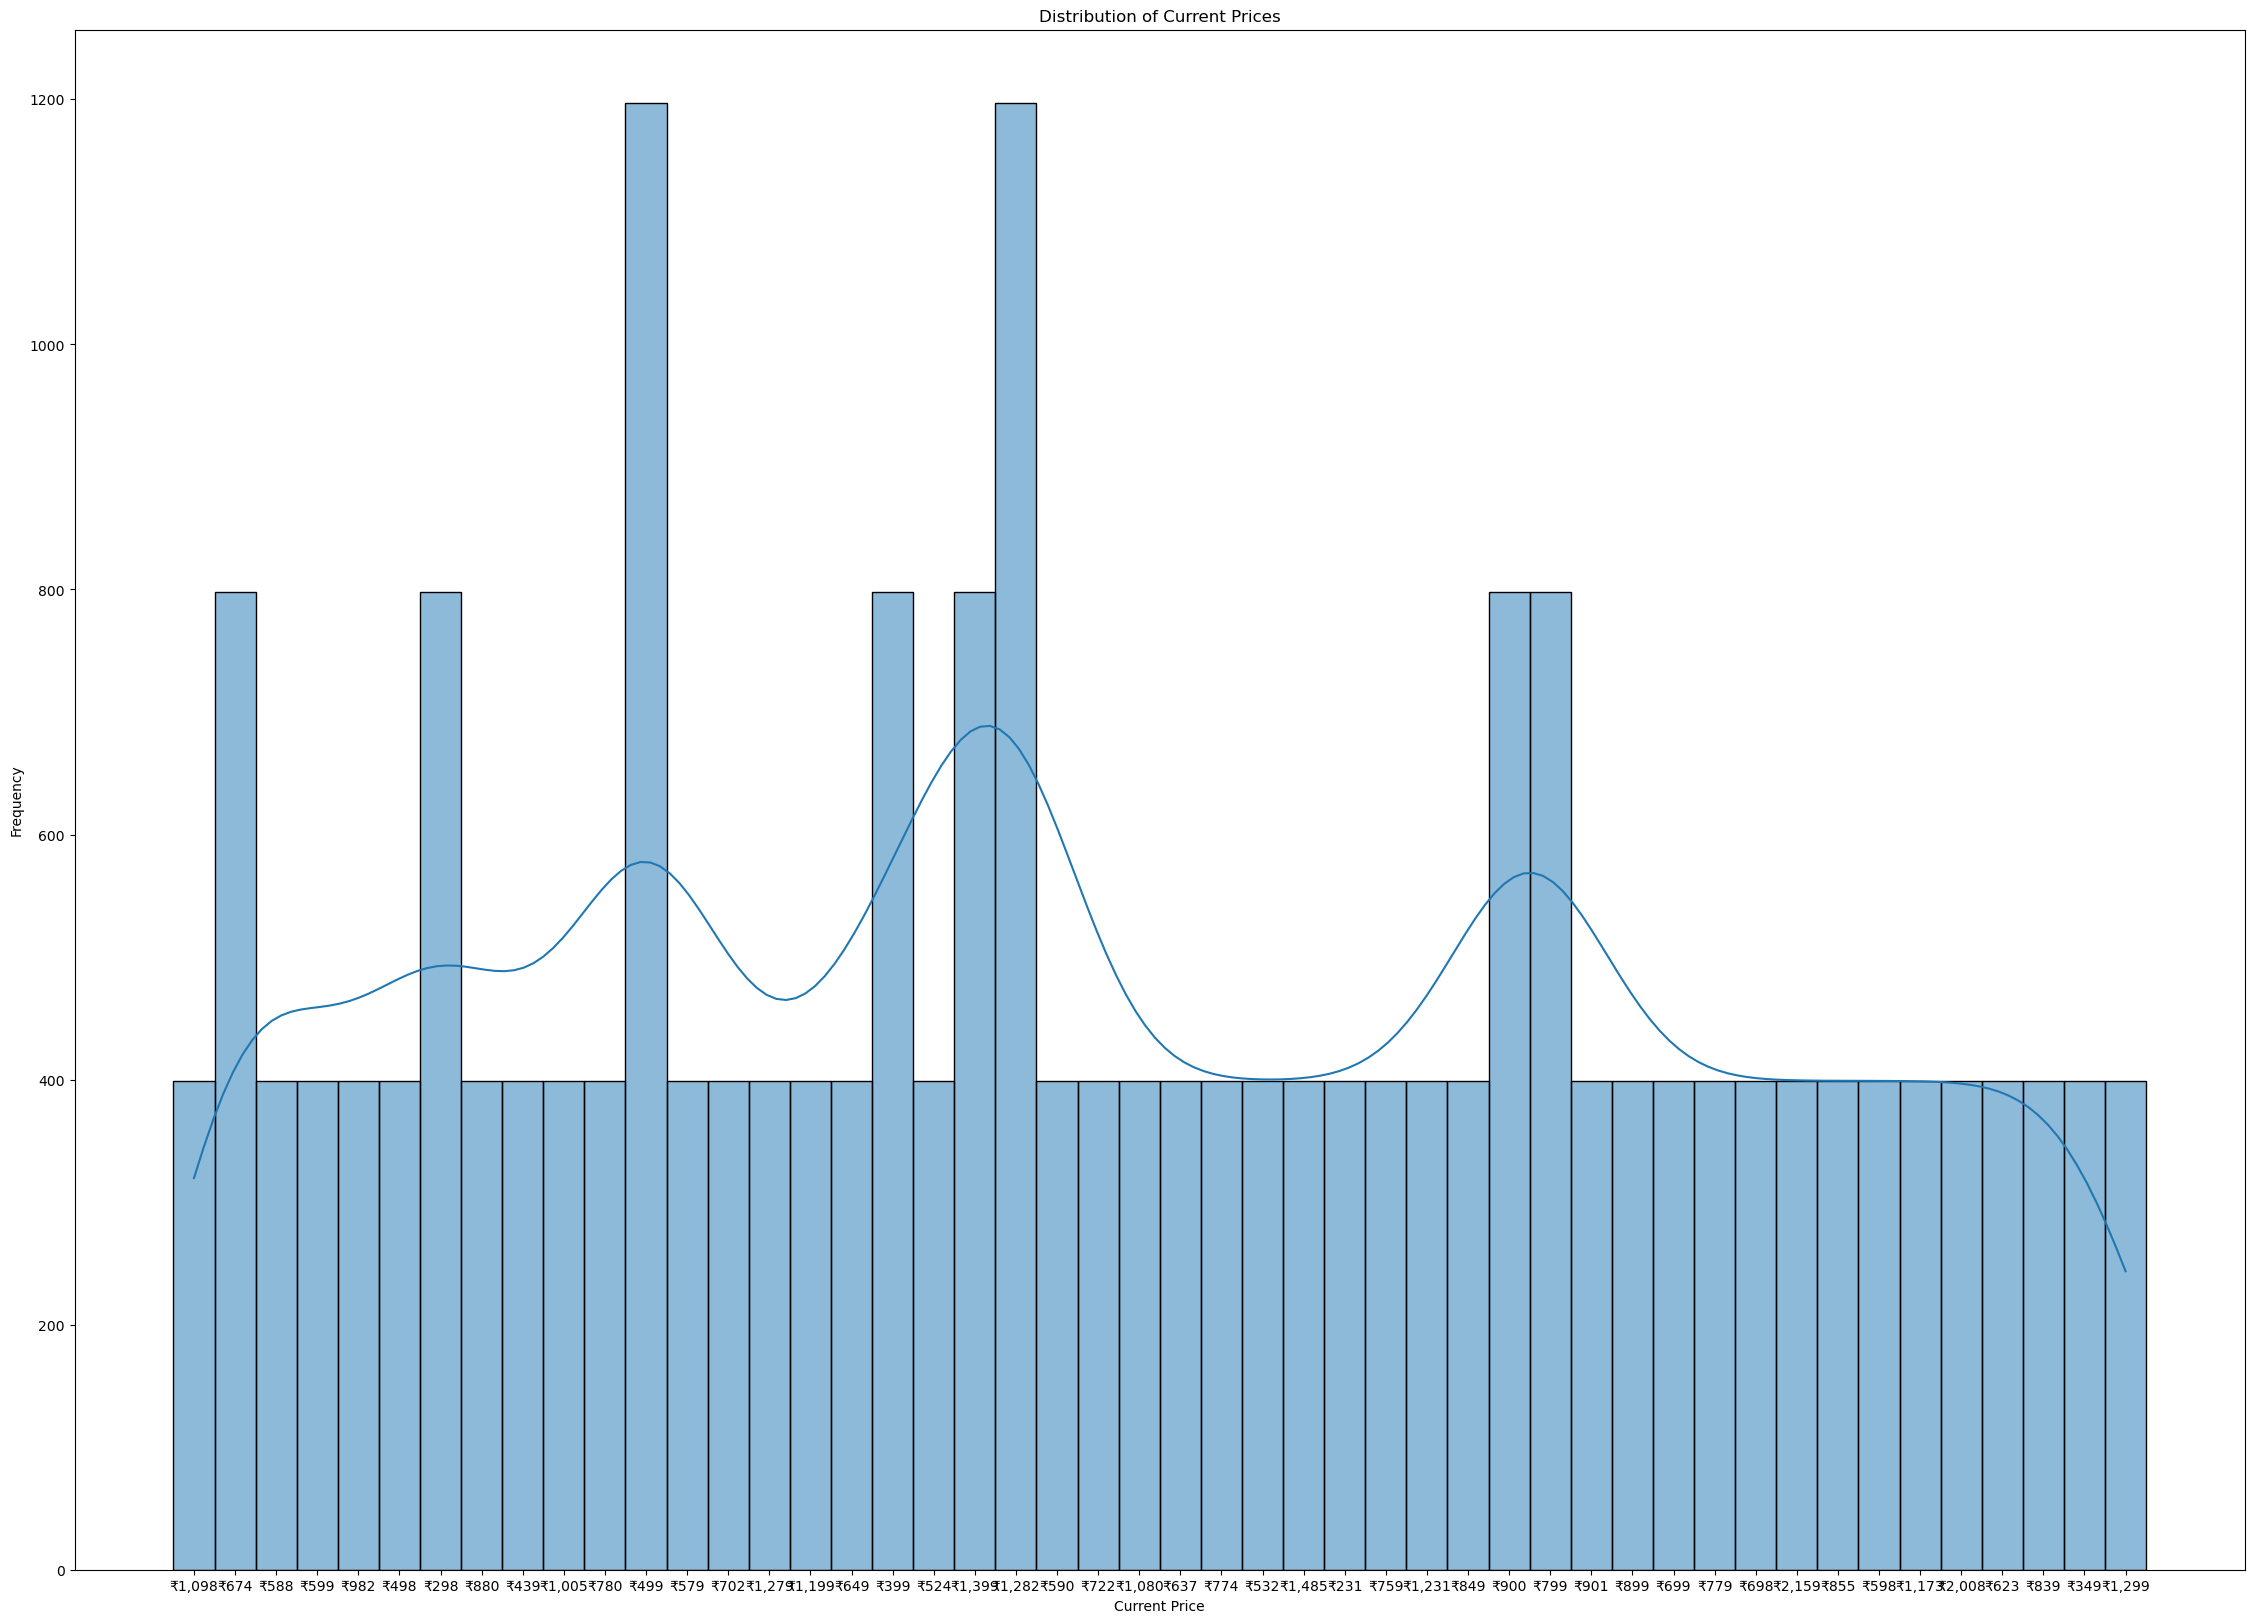

In [6]:
plt.figure(figsize=(28, 20))
sns.histplot(Shoe_df['Current_Price'], bins=30, kde=True)
plt.title('Distribution of Current Prices')
plt.xlabel('Current Price')
plt.ylabel('Frequency')
plt.show()

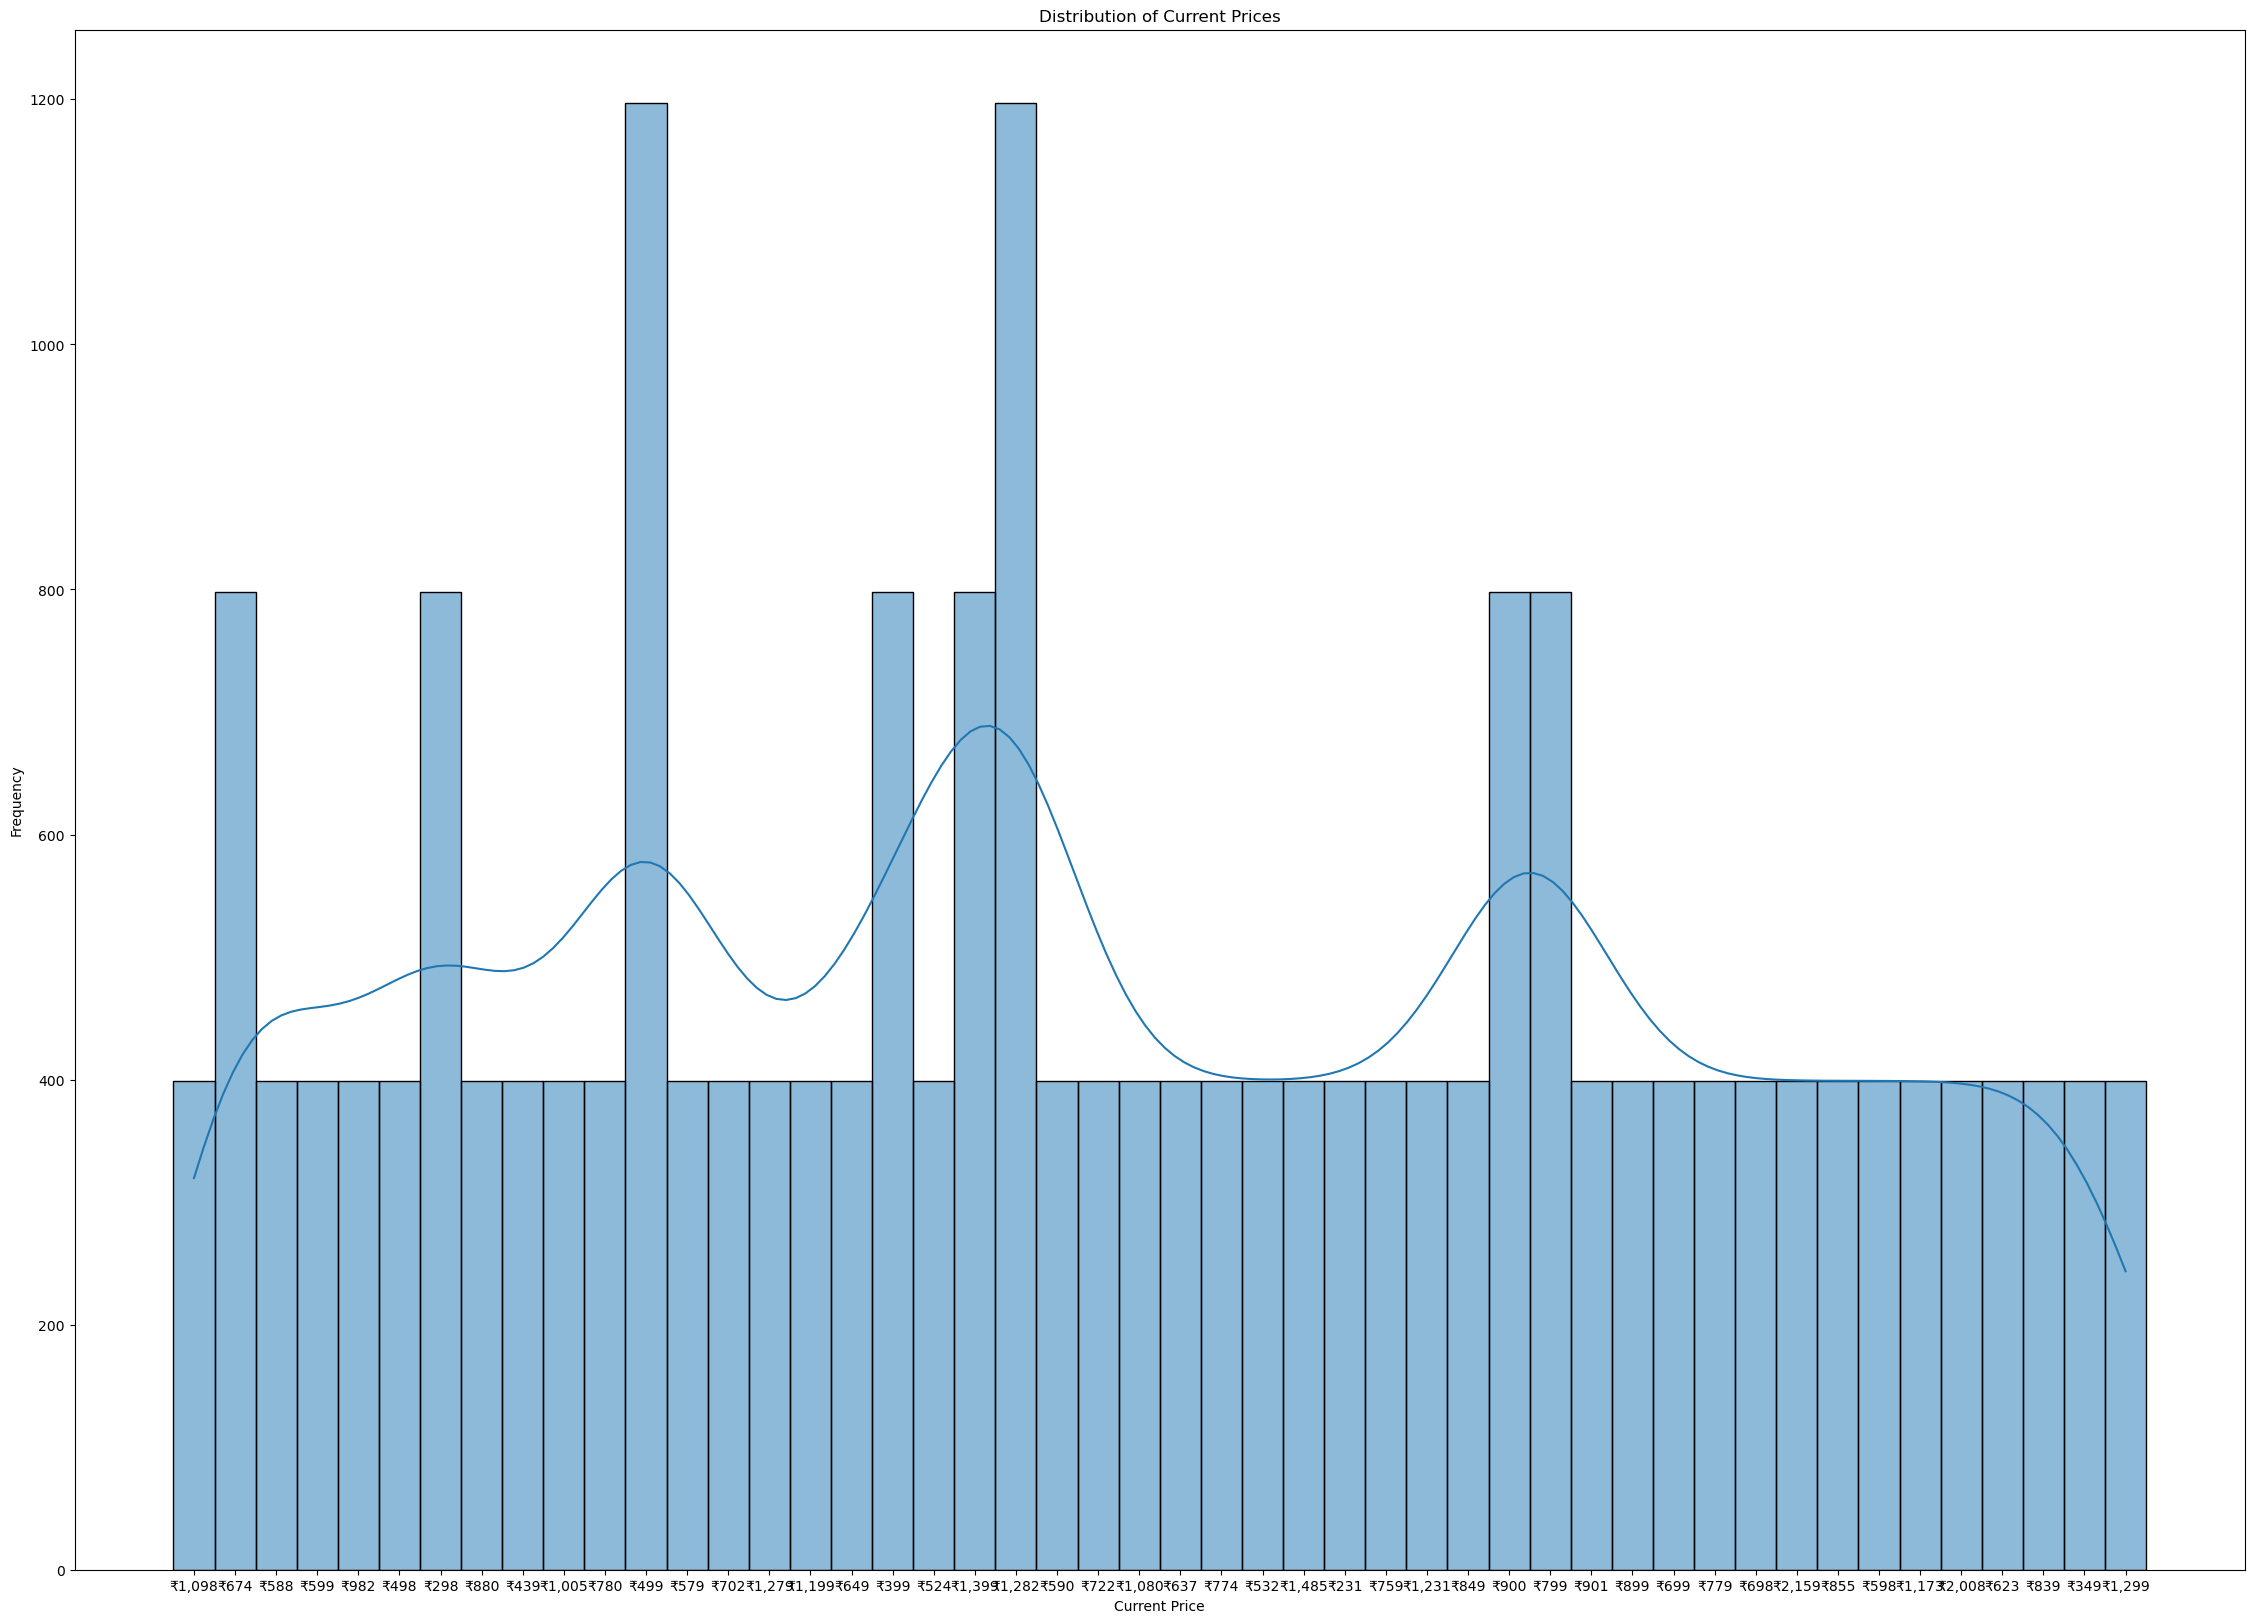

In [7]:
plt.figure(figsize=(28, 20))
sns.histplot(Shoe_df['Current_Price'], bins=30, kde=True)
plt.title('Distribution of Current Prices')
plt.xlabel('Current Price')
plt.ylabel('Frequency')
plt.show()

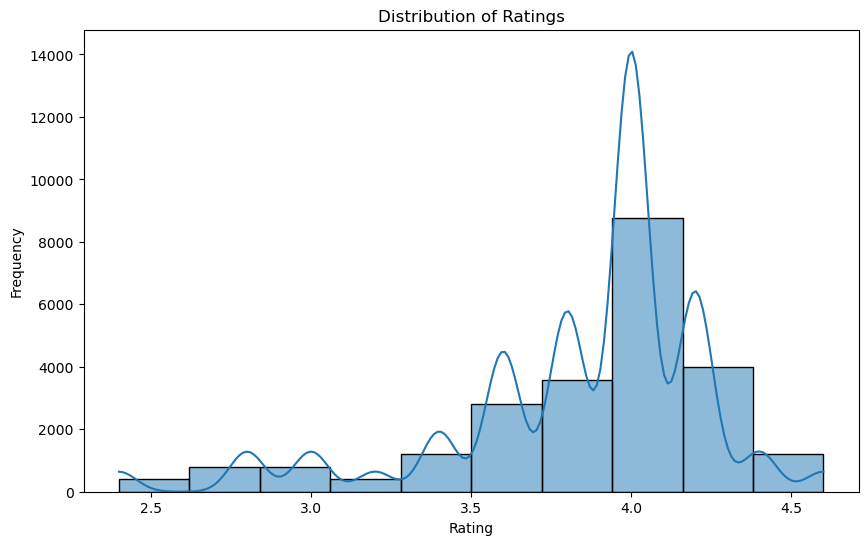

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(Shoe_df['RATING'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

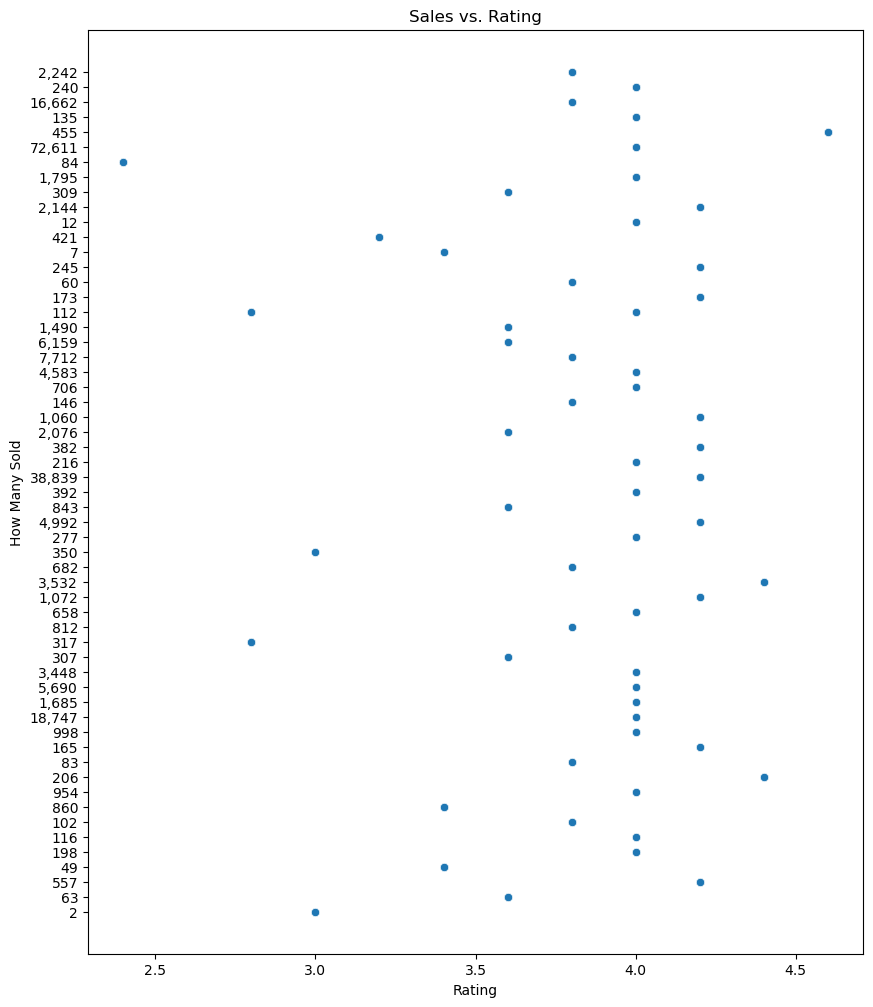

In [9]:
plt.figure(figsize=(10, 12))
sns.scatterplot(x='RATING', y='How_Many_Sold', data=Shoe_df)
plt.title('Sales vs. Rating')
plt.xlabel('Rating')
plt.ylabel('How Many Sold')
plt.show()

In [10]:
# Hapus simbol mata uang dan koma, lalu konversi ke format numerik
Shoe_df['Current_Price'] = Shoe_df['Current_Price'].replace({'₹': '', ',': ''}, regex=True).astype(float)

In [16]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [12]:
# Identify features
categorical_features = ['Brand_Name']
numerical_features = ['Current_Price', 'RATING']

In [13]:
# Create preprocessing pipelines
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [22]:
# Combine preprocessing steps
preprocessoring = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [23]:
# Apply preprocessing
X = Shoe_df.drop('How_Many_Sold', axis=1)  # Assuming 'How_Many_Sold' is the target
y = Shoe_df['How_Many_Sold']

In [24]:
X_processed = preprocessoring.fit_transform(X)

In [25]:
print(X_processed.shape)  # Periksa dimensi data yang telah diproses

(23940, 23)


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

In [28]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

In [29]:
# Hapus koma dan konversi ke float
Shoe_df['How_Many_Sold'] = Shoe_df['How_Many_Sold'].replace({',': ''}, regex=True).astype(float)

In [30]:
# Pisahkan fitur dan target
X = Shoe_df.drop('How_Many_Sold', axis=1)
y = Shoe_df['How_Many_Sold']

In [31]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi set latih dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Terapkan pra-pemrosesan pada data latih dan uji
X_train_processed = preprocessoring.fit_transform(X_train)
X_test_processed = preprocessoring.transform(X_test)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definisikan model
model = LinearRegression()

# Latih model
model.fit(X_train_processed, y_train)

# Buat prediksi
predictions = model.predict(X_test_processed)

# Evaluasi model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mse**0.5
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

MAE: 4411.051850596705
MSE: 86134015.02741888
RMSE: 9280.841288774358
R^2: 0.20980086176676904


In [35]:
import joblib

# Simpan model terbaik
joblib.dump(r2, 'modell.pkl')

['modell.pkl']

In [36]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load the model
model = joblib.load('model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    prediction = model.predict([data['features']])
    return jsonify(prediction=prediction.tolist())

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

c:\Users\ASUS\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
